#### Augmentation of Downloaded data
##### Preprocessing with ImageDataGenerator:-
###### Apply all the transformations defined in `train_datagen` (rescaling, rotation, zoom, and horizontal flips) in real-time as images are loaded
###### Resize all images to 224×224 pixels
###### Organize them into batches of 32 images

In [6]:
import os
import shutil

In [7]:
# Define source and target folder
source_dir = r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\raw"
target_base = r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\raw"

In [8]:
for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename) 
    ''' For each item, this creates 
    a complete file path by joining the directory path with the filename.'''
    # Skip directories and hidden files
    if not os.path.isfile(file_path):
        continue

In [9]:
# Loop over files
for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename)
    if filename.startswith("RS"):
        label = "rolled_in_scale"
    elif filename.startswith("PS"):
        label = "pitted_surface"
    elif filename.startswith("IN"):
        label = "inclusion"
    elif filename.startswith("CR"):
        label = "crazing" 
    elif filename.startswith("PA"):
        label = "patches"
    elif filename.startswith("SC"):
        label = "scratches"
    else:
        continue
    target_path = os.path.join(target_base, label, filename)
    # This line constructs a destination path for the file by joining three components:
    # - `target_base`: The base directory where files will be moved to
    # - `label`: The category folder determined by the file prefix (like "rolled_in_scale", "pitted_surface", etc.)
    # - `filename`: The original filename
    shutil.move(file_path, target_path)
    # This line uses the `shutil.move()` function to move the file from its original location 
    # (`file_path`) to the new categorized location (`target_path`). 
    # This effectively organizes files into subdirectories based on their prefixes.

#### Complete Code Explanation

This code organizes files from a source directory into categorized subdirectories based on filename prefixes:

1. **File Iteration**: Loops through all items in `source_dir` using `os.listdir()`

2. **Categorization Logic**: 
   - Examines each filename's prefix (e.g., "RS", "PS", "IN")
   - Maps prefixes to specific categories (e.g., "RS" → "rolled_in_scale")
   - Skips files with unrecognized prefixes using `continue`

3. **File Movement**:
   - Constructs a destination path combining `target_base`, the determined category label, and the original filename
   - Uses `shutil.move()` to relocate each file to its appropriate category folder

This script essentially implements an automated file sorting system, creating a more organized directory structure based on filename conventions.

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #Imports the ImageDataGenerator class from Keras
train_datagen = ImageDataGenerator( #instance of ImageDataGenerator
    rescale=1./255, #Scales pixel values from the default 0-255 range to 0-1 range
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    directory=r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\raw",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical' # Returns labels in categorical format (one-hot encoded)
) 
'''
1. Read images from the 'raw' directory
2. Apply all the transformations defined in `train_datagen` (rescaling, rotation, zoom, and horizontal flips) in real-time as images are loaded
3. Resize all images to 224×224 pixels
4. Organize them into batches of 32 images
5. Convert class labels to categorical (one-hot encoded) format
'''

Found 1440 images belonging to 6 classes.


"\n1. Read images from the 'raw' directory\n2. Apply all the transformations defined in `train_datagen` (rescaling, rotation, zoom, and horizontal flips) in real-time as images are loaded\n3. Resize all images to 224×224 pixels\n4. Organize them into batches of 32 images\n5. Convert class labels to categorical (one-hot encoded) format\n"

In [12]:
train_generator.class_indices


{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

#### Visualization of Augmented batch

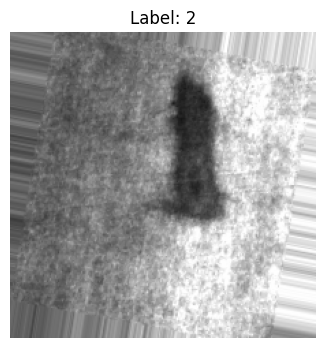

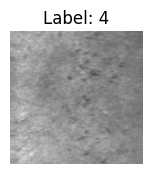

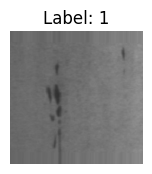

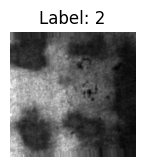

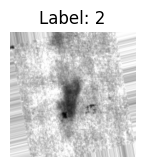

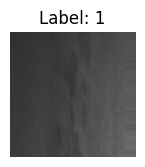

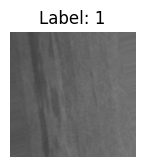

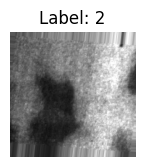

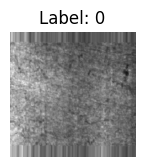

In [13]:
import matplotlib.pyplot as plt

# Fetch one batch
images, labels = next(train_generator)

# Show first 9 images from the batch
plt.figure(figsize=(10, 10)) #Creates a new figure with dimensions of 10x10 inches.
for i in range(9): #iterates through the first 9 images in the batch
    plt.subplot(3, 3, i + 1) #Creates a 3×3 grid of subplots and selects the (i+1)th subplot
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i].argmax()}") 
    ''' labels[i]` accesses the label for the i-th image in the batch. 
    This is likely a vector/array.argmax()` is a NumPy/TensorFlow/PyTorch method that returns the 
    index of the maximum value in the array. For example, if `labels[i]` is `[0, 0, 1, 0, 0]`, then `labels[i].argmax()` 
    returns `2` 
    '''
    plt.axis('off') #Hides the x and y axes
    plt.tight_layout()
    plt.show()


#### Exploratory Data Analysis
- Understand the dataset statistically and visually so you can:
- Detect class imbalance
- Spot issues (e.g. blurry images, duplicates, etc.)
- Build better models later  

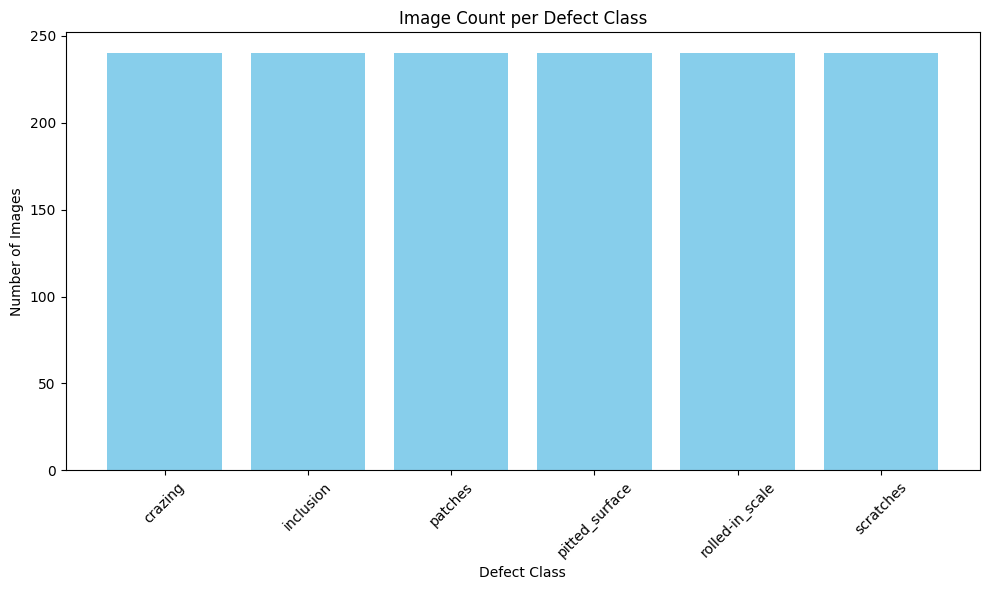

In [14]:
import os
import matplotlib.pyplot as plt

data_path = r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\raw"
classes = {}

# Loop through each class folder
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    '''
     When we loop through `os.listdir(data_path) we get a list of all items 
     (both files and directories), for each class we repeat the code below,
     first it will run for ex. crazing.
     '''
    if os.path.isdir(class_path): # checks for 
        # Count number of .jpg files
        num_images = len([f for f in os.listdir(class_path) if f.endswith('.jpg')])
        classes[class_name] = num_images

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classes.keys(), classes.values(), color='skyblue')
plt.xlabel('Defect Class')
plt.ylabel('Number of Images')
plt.title('Image Count per Defect Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step-by-Step Explanation
1. os.listdir(class_path)
- Returns a list of all files and directories inside class_path.
- Example output:
['CR_001.jpg', 'CR_002.jpg', 'notes.txt', 'CR_003.jpg', '.DS_Store']

2. [f for f in ... if f.endswith('.jpg')] -
- This is a list comprehension.
- It iterates over every file f in the list, and keeps only those that end with .jpg.
- Filtered result:
  ['CR_001.jpg', 'CR_002.jpg', 'CR_003.jpg']:-
  
3.  len(...)
- Calculates the length of the filtered list, i.e., the number of .jpg files.

In [15]:
classes

{'crazing': 240,
 'inclusion': 240,
 'patches': 240,
 'pitted_surface': 240,
 'rolled-in_scale': 240,
 'scratches': 240}

#### 👀 Visualizing Sample Images Per Class

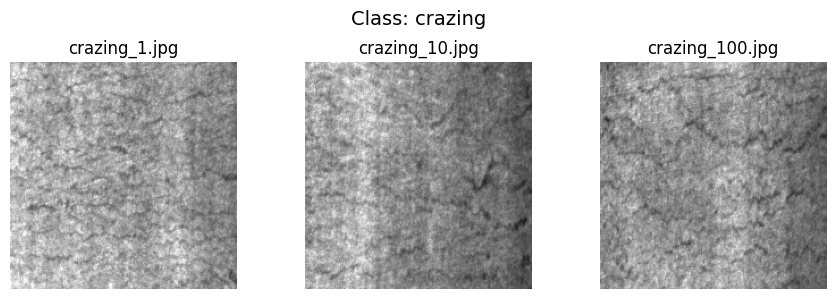

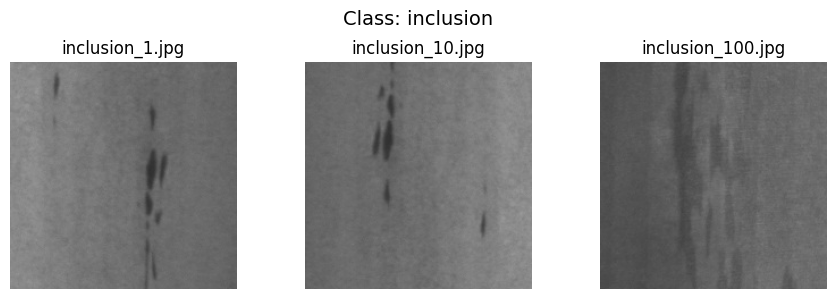

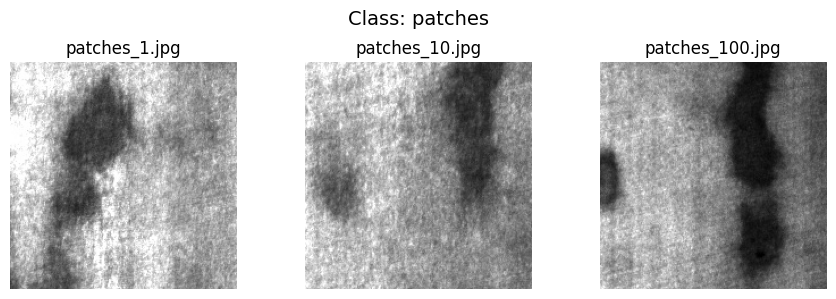

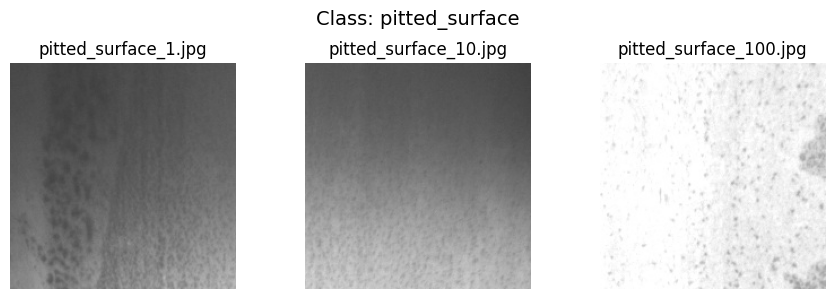

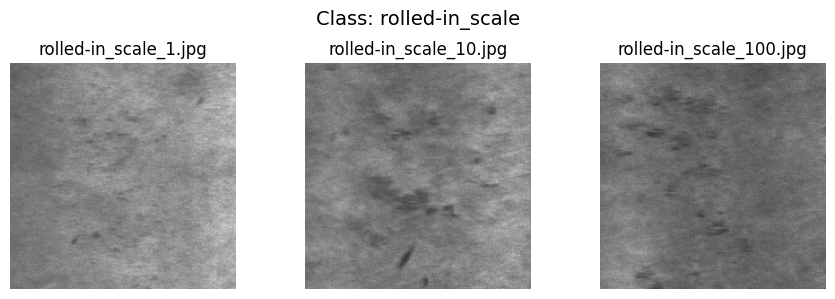

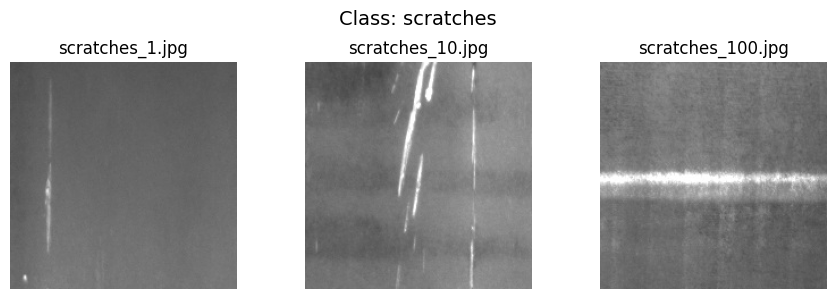

In [18]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\raw"
class_names = os.listdir(data_path)

# Show 3 images per class
for class_name in class_names:
    class_path = os.path.join(data_path, class_name)
    if not os.path.isdir(class_path):
        continue

    image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')][:3]

    plt.figure(figsize=(9, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=14)

    for i, image_name in enumerate(image_files): #enumerate() function adds a counter to each item in a list or other iterable.Returns (index, filename) for each image in image_files.
        image_path = os.path.join(class_path, image_name)
        img = mpimg.imread(image_path)

        plt.subplot(1, 3, i + 1) #Creates a subplot grid of 1 row, 3 columns, and selects the i+1-th position.
        plt.imshow(img, cmap='gray')
        plt.title(f"{image_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


#### Basic Model
Uses softmax + categorical_crossentropy because your labels are one-hot encoded

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # If using color; for grayscale use (224, 224, 1)
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 defect classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### 🟩 Input Layer:-
- Takes an image of shape 224×224 pixels with 3 channels (RGB)
- If using grayscale, change to (224, 224, 1)

### 🧠 Conv2D + MaxPooling (First Block):-
- Conv2D(32, (3, 3)) → 32 filters, each of size 3×3
- Slides over the image to extract features like edges, textures, shapes
- activation='relu' → Applies ReLU to add non-linearity
- MaxPooling2D((2, 2)) → Downsamples (reduces size by 2×2 block)- Makes the network more efficient and less sensitive to small translations

### 🧠 Second Conv Block:-
- with 64 filters (more complex patterns)
- Deeper layer = higher-level features

### 🧠 Third Conv Block:-
- with 64 filters (more complex patterns)

### 🟫 Flatten:-
- Converts the 3D tensor (height × width × channels) into a 1D vector
- Makes it ready for fully connected layers

###  Dense Layer + Dropout:-
- Dense(128) → Fully connected layer with 128 neurons
- Dropout(0.5) → Turns off 50% neurons randomly during training to prevent overfitting

### 🟩 Output Layer:-
- Dense(6) → One neuron for each of the 6 defect classes
- activation='softmax' → Converts outputs into probabilities that sum to 1

In [25]:
model.fit(train_generator, epochs=10)

C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2024 - loss: 2.4869 
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2917 - loss: 1.5779 
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4059 - loss: 1.3443
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5303 - loss: 1.1403
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5386 - loss: 1.1600
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6156 - loss: 0.9286
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7195 - loss: 0.7012 
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7590 - loss: 0.6621
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7611 - loss: 0.6345
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8428 - loss: 0.4753


In [26]:
model.save("models/cnn_baseline.h5")

##### Training curves

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8157 - loss: 0.5009
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8585 - loss: 0.4241   
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8877 - loss: 0.3415   
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8231 - loss: 0.5265
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8430 - loss: 0.4152
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8815 - loss: 0.3783
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8963 - loss: 0.3338 
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9165 - loss: 0.2966
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8452 - loss: 0.5029
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8412 - loss: 0.5167


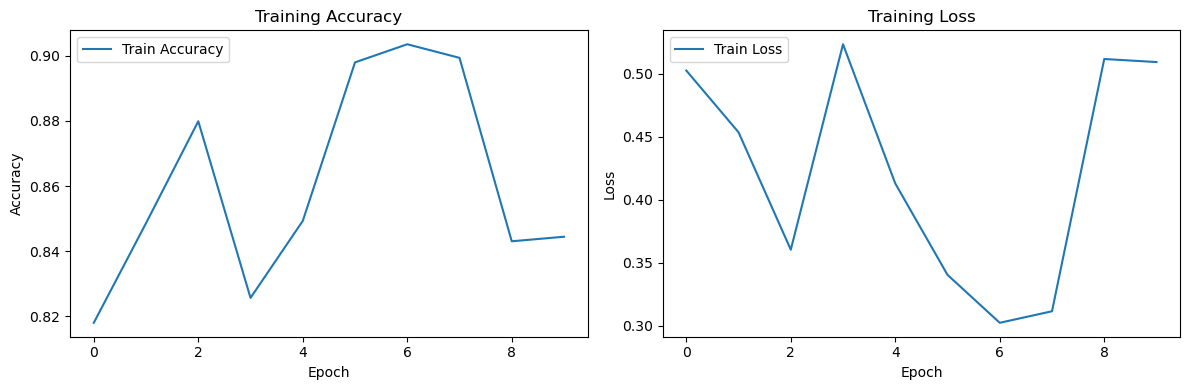

In [41]:
history = model.fit(train_generator, epochs=10)

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
model.save("models/cnn_baseline.h5")

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load base model without top classifier
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model (initially)
base_model.trainable = False

# Add custom classifier
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

#### include_top=False – What It Really Means
- In a pretrained CNN like MobileNetV2, The architecture has two parts:
- | Part                             | Role                                                            |
| -------------------------------- | --------------------------------------------------------------- |
| **Base** (Convolutional Layers)  | Extracts features like edges, textures, shapes                  |
| **Top** (Fully Connected Layers) | Classifies into ImageNet classes (e.g., dog, car, banana, etc.) |
- include_top=True means:Load everything — base + final dense layers (typically ending in 1000 classes for ImageNet). Not useful for your defect detection task (wrong classes)

- include_top=False means:Load only the base (feature extractor part). We’ll add our own top/classifier layer (like Dense(6) for your defect classes)


#### base_model.trainable = False – What It Does
- This line freezes the base model
  + It tells TensorFlow: do not update these weights during training
  + The pretrained layers keep their learned filters as-is

- ❓Why freeze it?
  Because:
  + You don't want to destroy the powerful knowledge learned from ImageNet
  + Your dataset is small (NEU), and training everything might overfit or take longer
  + This speeds up training a lot

In [20]:
history_mobilenet = model.fit(train_generator, epochs=10)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 947ms/step - accuracy: 0.7993 - loss: 0.6229
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 809ms/step - accuracy: 0.9660 - loss: 0.1314
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 795ms/step - accuracy: 0.9785 - loss: 0.0782
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 840ms/step - accuracy: 0.9826 - loss: 0.0637
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 835ms/step - accuracy: 0.9840 - loss: 0.0633
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 834ms/step - accuracy: 0.9861 - loss: 0.0446
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 801ms/step - accuracy: 0.9896 - loss: 0.0379
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 792ms/step - accuracy: 0.9882 - loss: 0.0396
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 806ms/step - accuracy: 0.9931 - loss: 0.0323
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 808ms/step - accuracy: 0.9944 - loss: 0.0200


In [37]:
model.save(r"D:\Python_Programs\Projects\Steel-surface-defect-detector\models\mobilenetv2_defect.keras")


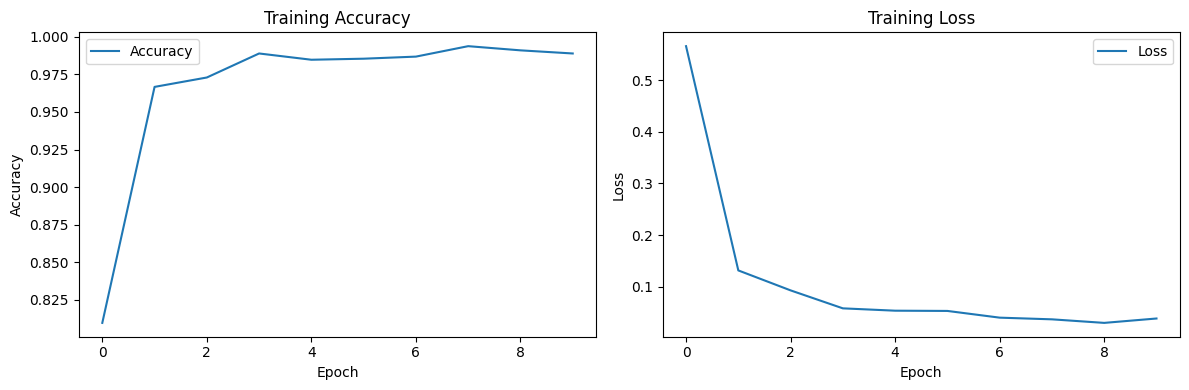

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet['accuracy'], label='Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet['loss'], label='Loss')
plt.title("Training Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig(r"D:\Python_Programs\Projects\Steel-surface-defect-detector\results_&_assets\training_curves.png")
plt.show()


### Evaluation & Optimization

##### Validation generator (no augmentation, just rescaling)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    directory=r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\validation_data",
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False  # IMPORTANT for evaluation
)

Found 360 images belonging to 6 classes.


#### Evaluation

In [42]:
from tensorflow.keras.models import load_model
model = load_model(r"D:/Python_Programs/Projects/Steel-surface-defect-detector/models/mobilenetv2_defect.keras")

loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 738ms/step - accuracy: 0.9917 - loss: 0.0309
Validation Accuracy: 0.9917
Validation Loss: 0.0309


#### Classification Report & Confusion Matrix

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 882ms/step
                 precision    recall  f1-score   support

        crazing       0.98      1.00      0.99        60
      inclusion       1.00      0.98      0.99        60
        patches       1.00      1.00      1.00        60
 pitted_surface       1.00      0.98      0.99        60
rolled-in_scale       0.98      1.00      0.99        60
      scratches       0.98      0.98      0.98        60

       accuracy                           0.99       360
      macro avg       0.99      0.99      0.99       360
   weighted avg       0.99      0.99      0.99       360



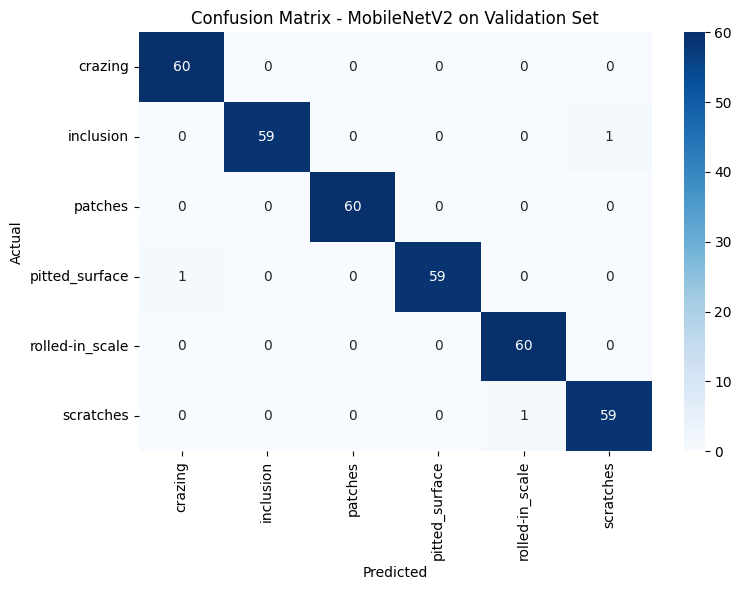

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNetV2 on Validation Set")
plt.tight_layout()
plt.savefig(r"D:\Python_Programs\Projects\Steel-surface-defect-detector\results_&_assets\confusion_matrix.png")
plt.show()

In [23]:
val_generator

In [25]:
val_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

In [19]:
val_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

In [21]:
val_generator.class_indices.keys()

dict_keys(['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches'])

In [23]:
list(val_generator.class_indices.keys())

['crazing',
 'inclusion',
 'patches',
 'pitted_surface',
 'rolled-in_scale',
 'scratches']

| Metric                  | Value    | Interpretation                          |
| ----------------------- | -------- | --------------------------------------- |
| **Validation Accuracy** | `99.17%` | Very high generalization capability     |
| **Validation Loss**     | `0.0309` | Low confidence error (excellent)        |
| **Macro F1-score**      | `0.99`   | Balanced performance across all classes |

### Inference & Live Prediction

##### Load Model & Class Mapping

In [44]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

# Load your saved model
model = load_model(r"D:\Python_Programs\Projects\Steel-surface-defect-detector\models\mobilenetv2_defect.keras")

# Define class index-to-name mapping
class_indices = {
    0: "crazing",
    1: "inclusion",
    2: "patches",
    3: "pitted_surface",
    4: "rolled-in_scale",
    5: "scratches"
}

#### Inference Function

In [46]:
def predict_defect(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img) #Output: a NumPy array with class probabilities per image. Example:[[0.01, 0.97, 0.02]]
    predicted_class = np.argmax(predictions, axis=1)[0] #gets the index of the highest probability along the class axis.
    # np.argmax returns an array but with a single value here, so in order to extract our answer as an int. we use[0] to get the class no.
    confidence = np.max(predictions)

    # Return class name + confidence
    return class_indices[predicted_class], confidence


In [47]:
file_path = r"D:\Python_Programs\Projects\Steel-surface-defect-detector\data\Clean_Steel_Surface\Screenshot 2025-12-13 154300.png"  # or any image you like
predicted_label, confidence = predict_defect(file_path)

print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: pitted_surface
Confidence: 0.89


In [112]:
# Showing our prediction and Image
import cv2
def show_and_save_prediction(image_path, save_path="results/real_prediction.png"):
    label, confidence = predict_defect(image_path)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label} ({confidence*100:.1f}%)")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path) 
    plt.show()


In [35]:
import os
os.path.exists("D:/Python_Programs/Projects/Steel-surface-defect-detector/models/mobilenetv2_defect.keras")

True

### Conceptually:
#### pickle is Python’s generic object serialization tool.
#### It means:“Take this Python object and write its internal state to disk.”

#### pickle is useful for Python-only data, such as:

training history (dict)\
metrics\
configuration dictionaries\
class name mappings\
thresholds\
scalers (sometimes)\
small helper objects

#### pickle should NOT be used for:

❌ deep learning models\
❌ TensorFlow / Keras graphs\
❌ anything framework-managed\
❌ cross-version artifacts

In [ ]:
import pickle

with open(r"D:\Python_Programs\Projects\Steel-surface-defect-detector\models\mobilenetv2_defect.pkl", "wb") as f:
    pickle.dump(history_mobilenet.history, f)

In [ ]:
###### To use it
with open(r"D:\Python_Programs\Projects\Steel-surface-defect-detector\models\mobilenetv2_defect.pkl", "rb") as f:
    history_mobilenet = pickle.load(f)